In [2]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt


In [3]:
params = {
    'h': 0.67, #hubble constant
    'Omega_b': 0.049, #baryon density
    'Omega_cdm': 0.266, #dark matter density
    'Omega_k': 0.0,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,

    # Neutrinos
    'N_ur': 2.0328,        # massless species in eV
    'N_ncdm': 1,
    'm_ncdm': 0.1,         # eV
    'output': 'mPk',
    'P_k_max_1/Mpc': 10.0, #pc is pascals
    'z_pk': 0
}
# while doing it offline jupyter notebook make sure to add 'YHe' : 0.24

In [4]:
cosmo = Class()
cosmo.set(params)
cosmo.compute()


In [5]:
k = np.logspace(-3, 1, 300)  # 1/Mpc
Pk_nu = np.array([cosmo.pk(ki, 0) for ki in k])

cosmo.struct_cleanup()
cosmo.empty()


In [6]:
#mass is considered 0
params['m_ncdm'] = 0.0

cosmo = Class()
cosmo.set(params)
cosmo.compute()

Pk_cdm = np.array([cosmo.pk(ki, 0) for ki in k])

cosmo.struct_cleanup()
cosmo.empty()


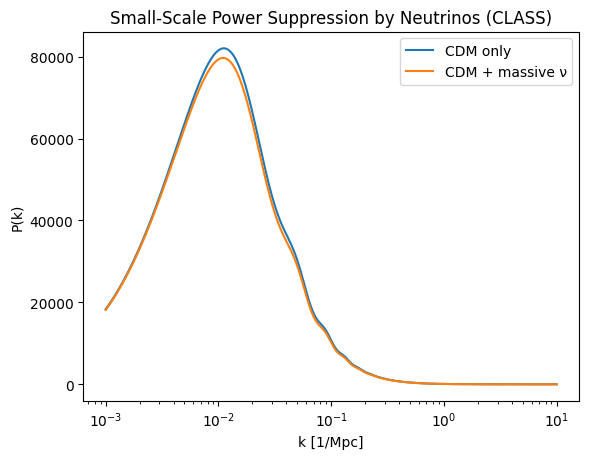

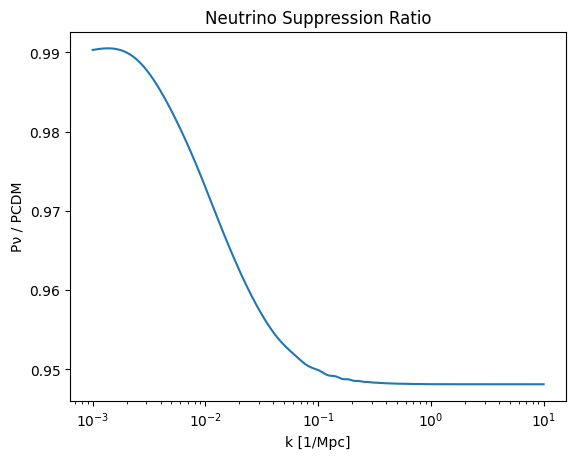

In [7]:
plt.figure()
plt.semilogx(k, Pk_cdm, label="CDM only")
plt.semilogx(k, Pk_nu, label="CDM + massive ν")
plt.xlabel("k [1/Mpc]")
plt.ylabel("P(k)")
plt.legend()
plt.title("Small-Scale Power Suppression by Neutrinos")
plt.show()

plt.figure()
plt.semilogx(k, Pk_nu / Pk_cdm)
plt.xlabel("k [1/Mpc]")
plt.ylabel("Pν / PCDM")
plt.title("Neutrino Suppression Ratio")
plt.show()


In [10]:
mass_values = [0.0, 0.05, 0.1, 0.2, 0.4] # eV
suppression_ratios = {}



for m in mass_values:
    if m == 0.0:
        temp_params = params.copy()
        temp_params['m_ncdm'] = m
        cosmo_temp = Class()
        cosmo_temp.set(temp_params)
        cosmo_temp.compute()
        Pk_m = np.array([cosmo_temp.pk(ki, 0) for ki in k])
        cosmo_temp.struct_cleanup()
        cosmo_temp.empty()
        suppression_ratios[m] = Pk_m / Pk_cdm
    else:
        temp_params = params.copy()
        temp_params['m_ncdm'] = m
        cosmo_temp = Class()
        cosmo_temp.set(temp_params)
        cosmo_temp.compute()
        Pk_m = np.array([cosmo_temp.pk(ki, 0) for ki in k])
        cosmo_temp.struct_cleanup()
        cosmo_temp.empty()
        suppression_ratios[m] = Pk_m / Pk_cdm

Here, `Pk_cdm` was computed with `m_ncdm = 0.0`. So, the suppression ratio `Pk_nu / Pk_cdm` for `m_ncdm = 0.0` should be 1.

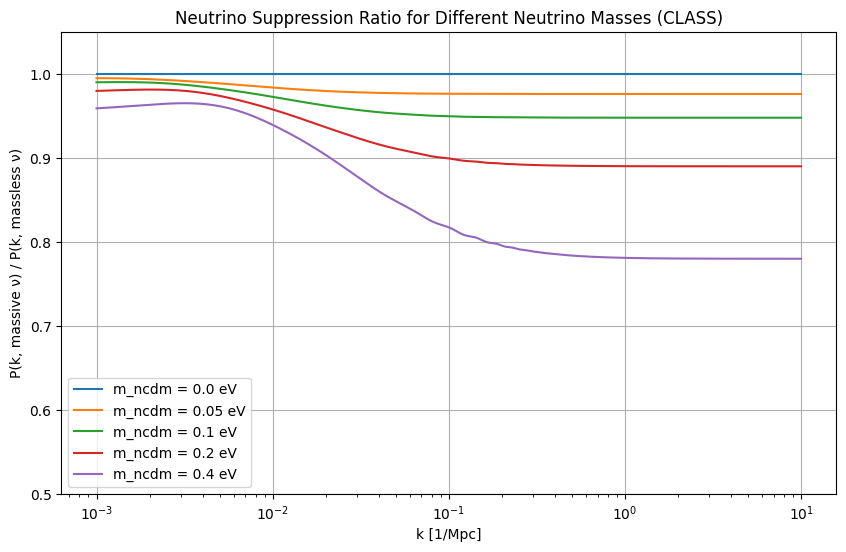

In [9]:
plt.figure(figsize=(10, 6))
for m, ratio in suppression_ratios.items():
    plt.semilogx(k, ratio, label=f'm_ncdm = {m} eV')

plt.xlabel('k [1/Mpc]')
plt.ylabel('P(k, massive \u03BD) / P(k, massless \u03BD)')
plt.title('Neutrino Suppression Ratio for Different Neutrino Masses (CLASS)')
plt.legend()
plt.grid(True)
plt.ylim(0.5, 1.05)
plt.show()